In [1]:
# 1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression


import pickle
import os
import re

In [2]:
# 2
idx = [(1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8)]
#idx = [(1, 0)]
for z, c in idx:
    data_set = pickle.load(open(r'label' + str(z) + '\goal_set.p', 'rb'))
    data = data_set['train'] + data_set['test'] + data_set['validate']
    dis_s = {}
    symptoms = {}
    for xy in data:
        disease = xy['disease_tag']
        dis_s.setdefault(disease, {'index':len(dis_s), 'symptom':dict()})
        temp2 = xy['goal']['implicit_inform_slots']
        temp2.update(xy['goal']['explicit_inform_slots'])
        for x, y in temp2.items():
            symptoms.setdefault(x, len(symptoms))
            dis_s[disease]['symptom'].setdefault(x, 0)
            dis_s[disease]['symptom'][x] += 1
    #for x in dis_s:
        #frequency = 0
        #for y in dis_s[x]['symptom']:
            #frequency += dis_s[x]['symptom'][y]
        #for y in dis_s[x]['symptom']:
            #dis_s[x]['symptom'][y] /= frequency
    symptoms['Total Symptom'] = len(symptoms)
    pickle.dump(obj = dis_s, file = open(r'label' + str(z) + '\out1.p', 'wb'), protocol = 2)
    pickle.dump(obj = symptoms, file = open(r'label' + str(z) + '\out2.p', 'wb'), protocol = 2)

10
0.8031111111111111
20
0.8525555555555555
30
0.8669999999999999
40
0.8743333333333334
50
0.8757777777777779
60
0.879111111111111
70
0.8827777777777778
80
0.8855555555555555
90
0.8873333333333332
100
0.8883333333333332


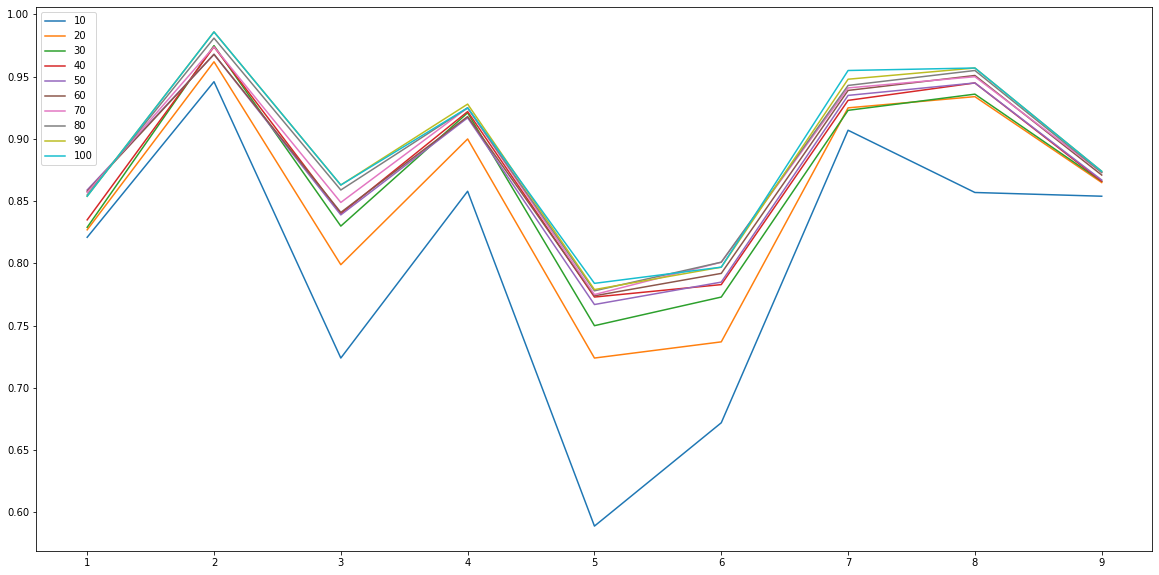

In [9]:
# 3
from sklearn.decomposition import PCA
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10
idx = [1, 2, 3, 4, 5, 6, 7, 8, 9]
idx2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for index in idx2:
    py = []
    avg = 0
    print(index)
    for z in idx:
        #print(z)
        temp_dict = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
        temp_data = pickle.load(open(r'label' + str(z) + '\out1.p', 'rb'))
        length = 0

        dict = {}
        dict1 = {}
        dict2 = {}
        dict3 = {}

        for xy in temp_dict:
            dict[length] = xy
            dict1[xy] = length
            length += 1

        length = 0
        for xy in temp_data:
            dict2[length] = xy
            dict3[xy] = length
            length += 1

        data_set = pickle.load(open(r'label' + str(z) + '\goal_set.p', 'rb'))
        data = data_set['train'] + data_set['test'] + data_set['validate']
        count1 = 0
    
        for xy in data:
            count1 += 1

        X = np.zeros(shape=(count1, temp_dict["Total Symptom"]), dtype=np.uint8)
        y = np.zeros(shape=(1, count1), dtype=np.uint8)
        y = y.flatten()
        count1 = 0
    
    
        for xy in data:
            for xx in xy['goal']['explicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            for xx in xy['goal']['implicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            y[count1] = dict3[xy['disease_tag']]
            count1 += 1
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        #print(int((temp_dict["Total Symptom"]*5+99)/100))
        pca = PCA(n_components = int((temp_dict["Total Symptom"]*index+99)/100))
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
    
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #print(accuracy_score(y_test, y_pred))
        avg += accuracy_score(y_test, y_pred)
        py.insert(0, accuracy_score(y_test, y_pred))
        
    py.reverse()
    plt.plot(idx, py, label = index)
    plt.legend()
    print(avg/9)

In [2]:
# 4
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10
idx = [1, 2, 3, 4, 5, 6, 7, 8, 9]
idx2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for index in idx2:
    py = []
    avg = 0
    print(index)
    for z in idx:
        #print(z)
        temp_dict = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
        temp_data = pickle.load(open(r'label' + str(z) + '\out1.p', 'rb'))
        length = 0

        dict = {}
        dict1 = {}
        dict2 = {}
        dict3 = {}

        for xy in temp_dict:
            dict[length] = xy
            dict1[xy] = length
            length += 1

        length = 0
        for xy in temp_data:
            dict2[length] = xy
            dict3[xy] = length
            length += 1

        data_set = pickle.load(open(r'label' + str(z) + '\goal_set.p', 'rb'))
        data = data_set['train'] + data_set['test'] + data_set['validate']
        count1 = 0
    
        for xy in data:
            count1 += 1

        X = np.zeros(shape=(count1, temp_dict["Total Symptom"]), dtype=np.uint8)
        y = np.zeros(shape=(1, count1), dtype=np.uint8)
        y = y.flatten()
        count1 = 0
    
    
        for xy in data:
            for xx in xy['goal']['explicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            for xx in xy['goal']['implicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            y[count1] = dict3[xy['disease_tag']]
            count1 += 1
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        #print(int((temp_dict["Total Symptom"]*5+99)/100))
        lda = LDA(n_components = index)
        X_train = lda.fit_transform(X_train, y_train)
        X_test = lda.transform(X_test)
    
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #print(accuracy_score(y_test, y_pred))
        avg += accuracy_score(y_test, y_pred)
        py.insert(0, accuracy_score(y_test, y_pred))
        
    py.reverse()
    plt.plot(idx, py, label = index)
    plt.legend()
    print(avg/9)

1


NameError: name 'pickle' is not defined

10
0.7521111111111112
20
0.8137777777777777
30
0.832
40
0.8438888888888889
50
0.8494444444444444
60
0.8515555555555556
70
0.854
80
0.8563333333333334
90
0.8567777777777779
100
0.8574444444444445


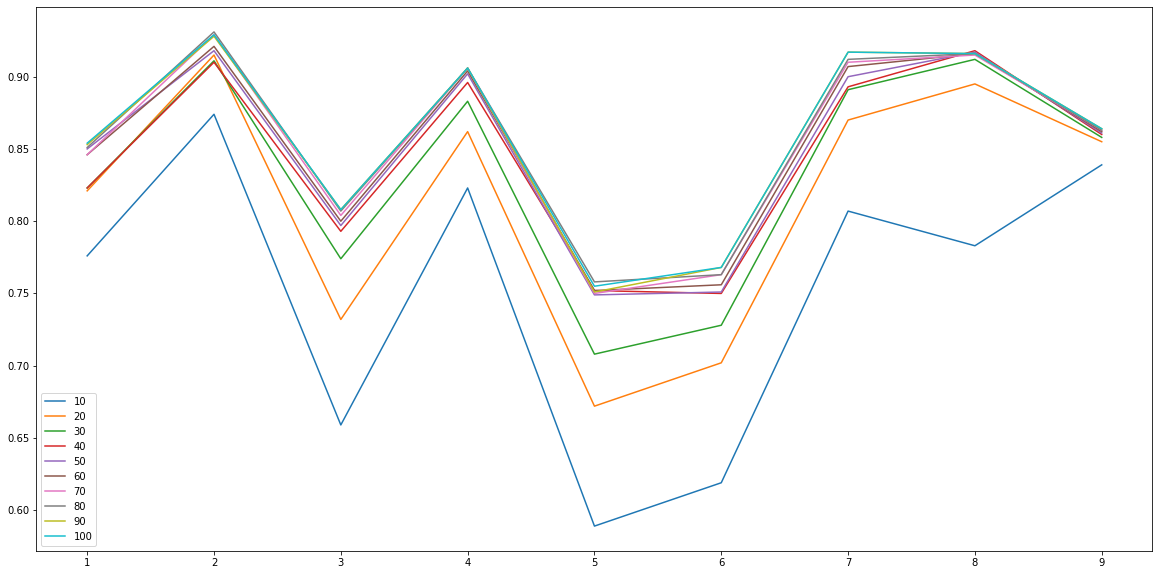

In [5]:
# 3
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10
idx = [1, 2, 3, 4, 5, 6, 7, 8, 9]
idx2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for index in idx2:
    py = []
    avg = 0
    print(index)
    for z in idx:
        #print(z)
        temp_dict = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
        temp_data = pickle.load(open(r'label' + str(z) + '\out1.p', 'rb'))
        length = 0

        dict = {}
        dict1 = {}
        dict2 = {}
        dict3 = {}

        for xy in temp_dict:
            dict[length] = xy
            dict1[xy] = length
            length += 1

        length = 0
        for xy in temp_data:
            dict2[length] = xy
            dict3[xy] = length
            length += 1

        data_set = pickle.load(open(r'label' + str(z) + '\goal_set.p', 'rb'))
        data = data_set['train'] + data_set['test'] + data_set['validate']
        count1 = 0
    
        for xy in data:
            count1 += 1

        X = np.zeros(shape=(count1, temp_dict["Total Symptom"]), dtype=np.uint8)
        y = np.zeros(shape=(1, count1), dtype=np.uint8)
        y = y.flatten()
        count1 = 0
    
    
        for xy in data:
            for xx in xy['goal']['explicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            for xx in xy['goal']['implicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            y[count1] = dict3[xy['disease_tag']]
            count1 += 1
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        #print(int((temp_dict["Total Symptom"]*index+99)/100))
        kpca = KernelPCA(n_components = int((temp_dict["Total Symptom"]*index+99)/100), kernel = 'rbf')
        X_train = kpca.fit_transform(X_train)
        X_test = kpca.transform(X_test)
    
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #print(accuracy_score(y_test, y_pred))
        avg += accuracy_score(y_test, y_pred)
        py.insert(0, accuracy_score(y_test, y_pred))
        
    py.reverse()
    plt.plot(idx, py, label = index)
    plt.legend()
    print(avg/9)

## Disease Classifier

In [49]:
# classifier
idx = [1, 2, 3, 4, 5, 6, 7, 8, 9]
avg = 0
d = 0
nd = 0

for z in idx:
    temp_dict = pickle.load(open(r'label' + str(z) + '\label_unique.p', 'rb'))
    temp_data = pickle.load(open(r'label' + str(z) + '\out1.p', 'rb'))
    dis = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
    
    data_set = pickle.load(open(r'label' + str(z) + '\goal_set.p', 'rb'))
    data = data_set['train'] + data_set['test'] + data_set['validate']
    #temp_dict.pop('Total Symptom')

    dict_sym_i ={}
    dict_i_sym = {}
    total_sym = 0
    for xy in temp_dict:
        dict_sym_i[xy] = total_sym
        dict_i_sym[total_sym] = xy
        total_sym += 1
        
    #pickle.dump(obj = dict_sym_i, file = open('dict_sym_i.p', 'wb'), protocol = 2)
    #pickle.dump(obj = dict_i_sym, file = open('dict_i_sym.p', 'wb'), protocol = 2)
    
    dict_dis_i = {}
    dict_i_dis = {}
    total_dis = 0
    for xy in temp_data:
        dict_dis_i[xy] = total_dis
        dict_i_dis[total_dis] = xy
        total_dis +=1
    #pickle.dump(obj = dict_dis_i, file = open('dict_dis_i.p', 'wb'), protocol = 2)
    #pickle.dump(obj = dict_i_dis, file = open('dict_i_dis.p', 'wb'), protocol = 2)
    
    total_dia = 0
    for xy in data:
        total_dia += 1
    
    print(z)
    print(dis['Total Symptom'])
    print(total_sym)
    X = np.zeros(shape=(total_dia, total_sym), dtype=np.uint8)
    y = np.zeros(shape=(1, total_dia), dtype=np.uint8)
    y = y.flatten()
    total_dia = 0
    
    for xy in data:
        for xx in xy['goal']['explicit_inform_slots']:
            if xx in dict_sym_i:
                X[total_dia][dict_sym_i[xx]] = 1
        for xx in xy['goal']['implicit_inform_slots']:
            if xx in dict_sym_i:
                X[total_dia][dict_sym_i[xx]] = 1
        y[total_dia] = dict_dis_i[xy['disease_tag']]
        total_dia += 1
        
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    classifier = SVC(kernel = 'linear', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    
    avg += accuracy_score(y_test, y_pred)
    d += dis['Total Symptom']
    nd += total_sym
    #pickle.dump(classifier, open(r'label' + str(z) + '\or.sav', 'wb'))

print(" ")
print(avg/9)
print(d)
print(nd)

1
65
39
0.667
2
89
65
0.826
3
68
48
0.697
4
58
32
0.634
5
46
29
0.451
6
51
32
0.455
7
62
35
0.589
8
69
44
0.711
9
73
36
0.61
 
0.6266666666666667
581
360


In [ ]:
100 - 0.8883333333333332
90  - 0.888
80  - 0.8832222222222222 (0.005)
70  - 0.8774444444444444 (0.006)

In [44]:
#label_unique
idx = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for z in idx:
    print(z)
    temp_dict = pickle.load(open(r'label' + str(z) + '\out2.p', 'rb'))
    temp_data = pickle.load(open(r'label' + str(z) + '\out1.p', 'rb'))

    dict = {}
    dict1 = {}
    
    length = 0
    for xy in temp_dict:
        dict[length] = xy
        dict1[xy] = length
        length += 1

    X = np.zeros(shape=(1, temp_dict["Total Symptom"]), dtype=np.uint8)
        
    for xy in temp_data:
        for xx in temp_data[xy]['symptom']:
            X[0][dict1[xx]] += 1
    #print(X)
    
    res = {}
    timer = 0
    for i in range (0, temp_dict["Total Symptom"]):
        if X[0][i] == 1:
            res[dict[i]] = timer
            timer += 1
            
    print(res)
    pickle.dump(obj = res, file = open(r'label' + str(z) + '\label_unique.p', 'wb'), protocol = 2)   

1
{'Loss of sensation': 0, 'Neck swelling': 1, 'Nausea': 2, 'Lower abdominal pain': 3, 'Swelling of scrotum': 4, 'Pelvic pain': 5, 'Vomiting': 6, 'Sore throat': 7, 'Arm swelling': 8, 'Arm lump or mass': 9, 'Swollen eye': 10, 'Abnormal appearing skin': 11, 'Spotting or bleeding during pregnancy': 12, 'Feeling hot and cold': 13, 'Sharp chest pain': 14, 'Loss of sex drive': 15, 'Headache': 16, 'Groin mass': 17, 'Itchy eyelid': 18, 'Eye redness': 19, 'Frequent urination': 20, 'Cough': 21, 'Shoulder swelling': 22, 'Pain in testicles': 23, 'Penis redness': 24, 'Paresthesia': 25, 'Vulvar sore': 26, 'Problems during pregnancy': 27, 'Cramps and spasms': 28, 'Neck cramps or spasms': 29, 'Irritable infant': 30, 'Ache all over': 31, 'Emotional symptoms': 32, 'Problems with movement': 33, 'Penis pain': 34, 'Elbow weakness': 35, 'Cross-eyed': 36, 'Nailbiting': 37, 'Bowlegged or knock-kneed': 38}
2
{'Congestion in chest': 0, 'Fever': 1, 'Symptoms of the kidneys': 2, 'Difficulty in swallowing': 3, 'Th

In [4]:
#1
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.847, 0.854, 0.855]
plt.plot(x, y1, label = 'chi2')
y2 = [0.842, 0.849, 0.854]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

NameError: name 'plt' is not defined

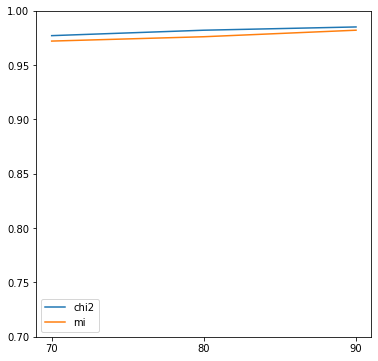

In [4]:
#2
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.977, 0.982, 0.985]
plt.plot(x, y1, label = 'chi2')
y2 = [0.972, 0.976, 0.982]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

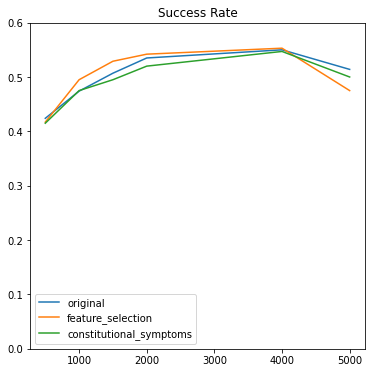

In [6]:
#3
rcParams['figure.figsize'] = 6, 6
x = [500, 1000, 1500, 2000, 4000, 5000]

y1 = [0.424, 0.474, 0.507, 0.535, 0.55, 0.514]
plt.plot(x, y1, label = 'original')
y2 = [0.417, 0.495, 0.529, 0.542, 0.553, 0.475]
plt.plot(x, y2, label = 'feature_selection')
y3 = [0.415, 0.475, 0.495, 0.52, 0.547, 0.5]
plt.plot(x, y3, label = 'constitutional_symptoms')
plt.ylim(0, 0.6)
plt.title("Success Rate")
plt.legend()

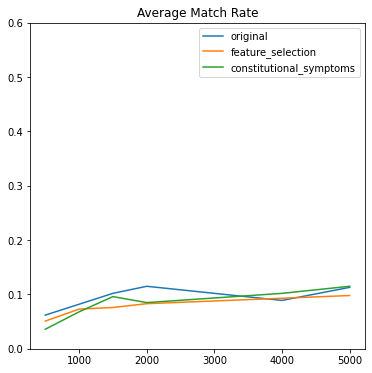

In [7]:
#4
rcParams['figure.figsize'] = 6, 6
x = [500, 1000, 1500, 2000, 4000, 5000]

y1 = [0.062, 0.082, 0.102, 0.115, 0.089, 0.113]
plt.plot(x, y1, label = 'original')
y2 = [0.051, 0.073, 0.076, 0.083, 0.093, 0.098]
plt.plot(x, y2, label = 'feature_selection')
y3 = [0.036, 0.068, 0.096, 0.085, 0.102, 0.115]
plt.plot(x, y3, label = 'constitutional_symptoms')
plt.ylim(0, 0.6)
plt.title("Average Match Rate")
plt.legend()

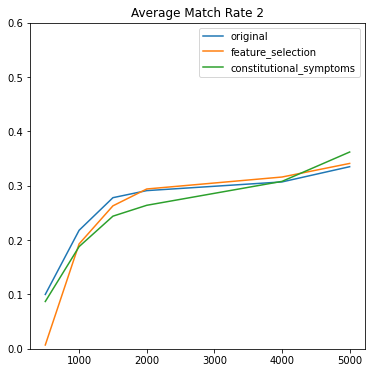

In [8]:
#5
rcParams['figure.figsize'] = 6, 6
x = [500, 1000, 1500, 2000, 4000, 5000]

y1 = [0.1, 0.218, 0.278, 0.291, 0.307, 0.335]
plt.plot(x, y1, label = 'original')
y2 = [0.007, 0.193, 0.263, 0.294, 0.316, 0.341]
plt.plot(x, y2, label = 'feature_selection')
y3 = [0.087, 0.188, 0.244, 0.264, 0.308, 0.362]
plt.plot(x, y3, label = 'constitutional_symptoms')
plt.ylim(0, 0.6)
plt.title("Average Match Rate 2")
plt.legend()

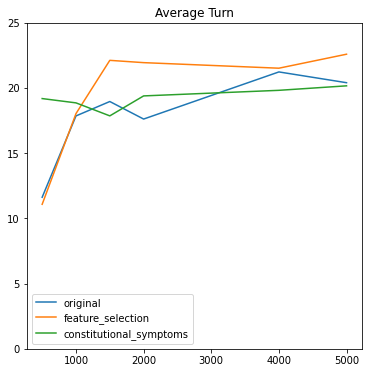

In [9]:
#6
rcParams['figure.figsize'] = 6, 6
x = [500, 1000, 1500, 2000, 4000, 5000]

y1 = [11.616, 17.85, 18.954, 17.61, 21.222, 20.396]
plt.plot(x, y1, label = 'original')
y2 = [11.076, 18.028, 22.11, 21.934, 21.508, 22.58]
plt.plot(x, y2, label = 'feature_selection')
y3 = [19.18, 18.85, 17.854, 19.384, 19.812, 20.156]
plt.plot(x, y3, label = 'constitutional_symptoms')
plt.ylim(0,25)
plt.title("Average Turn")
plt.legend()

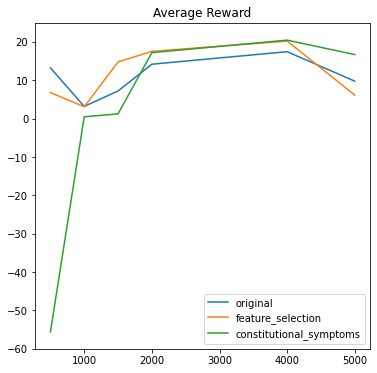

In [11]:
#7
rcParams['figure.figsize'] = 6, 6
x = [500, 1000, 1500, 2000, 4000, 5000]

y1 = [13.222, 3.168, 7.194, 14.168, 17.424, 9.746]
plt.plot(x, y1, label = 'original')
y2 = [6.776, 3.08, 14.762, 17.512, 20.196, 6.116]
plt.plot(x, y2, label = 'feature_selection')
y3 = [-55.594, 0.462, 1.232, 17.182, 20.438, 16.676]
plt.plot(x, y3, label = 'constitutional_symptoms')
plt.ylim(-60,25)
plt.title("Average Reward")
plt.legend()

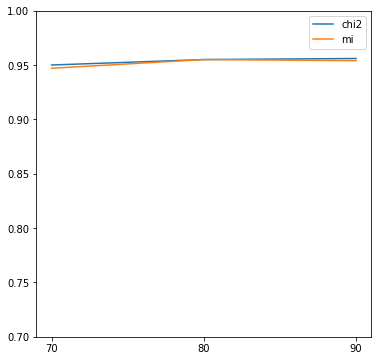

In [80]:
#8
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.95, 0.955, 0.956]
plt.plot(x, y1, label = 'chi2')
y2 = [0.947, 0.955, 0.954]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

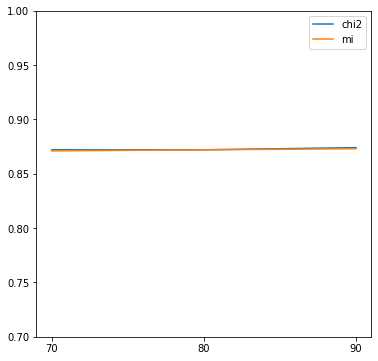

In [81]:
#9
rcParams['figure.figsize'] = 6, 6
x = ["70", "80", "90"]
y1 = [0.872, 0.872, 0.874]
plt.plot(x, y1, label = 'chi2')
y2 = [0.871, 0.872, 0.873]
plt.plot(x, y2, label = 'mi')
plt.ylim(0.7, 1)
plt.legend()

In [3]:
from sklearn.decomposition import PCA
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10
idx = [1]
idx2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for index in idx2:
    py = []
    avg = 0
    print(index)
    for z in idx:
        temp_dict = pickle.load(open('out2.p', 'rb'))
        temp_data = pickle.load(open('out1.p', 'rb'))
        length = 0

        dict = {}
        dict1 = {}
        dict2 = {}
        dict3 = {}

        for xy in temp_dict:
            dict[length] = xy
            dict1[xy] = length
            length += 1

        length = 0
        for xy in temp_data:
            dict2[length] = xy
            dict3[xy] = length
            length += 1

        data_set = pickle.load(open('goal_set.p', 'rb'))
        data = data_set['train'] + data_set['test'] + data_set['validate']
        count1 = 0
    
        for xy in data:
            count1 += 1

        X = np.zeros(shape=(count1, temp_dict["Total Symptom"]), dtype=np.uint8)
        y = np.zeros(shape=(1, count1), dtype=np.uint8)
        y = y.flatten()
        count1 = 0
    
    
        for xy in data:
            for xx in xy['goal']['explicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            for xx in xy['goal']['implicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            y[count1] = dict3[xy['disease_tag']]
            count1 += 1
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        #print(int((temp_dict["Total Symptom"]*5+99)/100))
        pca = PCA(n_components = int((temp_dict["Total Symptom"]*index+99)/100))
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
    
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #print(accuracy_score(y_test, y_pred))
        avg = accuracy_score(y_test, y_pred)
        print(avg)

10
0.7091666666666666
20
0.7496666666666667
30
0.7716666666666666
40
0.7838333333333334
50
0.7973333333333333
60
0.7983333333333333
70
0.8025
80
0.8036666666666666
90
0.8053333333333333
100
0.8078333333333333


In [14]:
from sklearn.decomposition import PCA
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10
idx = [1]
idx2 = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for index in idx2:
    py = []
    avg = 0
    print(index)
    for z in idx:
        temp_dict = pickle.load(open('out2.p', 'rb'))
        temp_data = pickle.load(open('out1.p', 'rb'))
        length = 0

        dict = {}
        dict1 = {}
        dict2 = {}
        dict3 = {}

        for xy in temp_dict:
            dict[length] = xy
            dict1[xy] = length
            length += 1

        length = 0
        for xy in temp_data:
            dict2[length] = xy
            dict3[xy] = length
            length += 1

        data_set = pickle.load(open('goal_set.p', 'rb'))
        data = data_set['train'] + data_set['test'] + data_set['validate']
        count1 = 0
    
        for xy in data:
            count1 += 1

        X = np.zeros(shape=(count1, temp_dict["Total Symptom"]), dtype=np.uint8)
        y = np.zeros(shape=(1, count1), dtype=np.uint8)
        y = y.flatten()
        count1 = 0
    
    
        for xy in data:
            for xx in xy['goal']['explicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            for xx in xy['goal']['implicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            y[count1] = dict3[xy['disease_tag']]
            count1 += 1
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        #print(int((temp_dict["Total Symptom"]*5+99)/100))
        pca = PCA(n_components = int((temp_dict["Total Symptom"]*index+99)/100))
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        from pickle import dump
        dump(pca, open(str(index) + 'pca.pkl', 'wb'))
    
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #print(accuracy_score(y_test, y_pred))
        avg = accuracy_score(y_test, y_pred)
    print(avg)

10
0.707
20
0.7495
30
0.7726666666666666
40
0.7833333333333333
50
0.7951666666666667
60
0.798
70
0.802
80
0.8036666666666666
90
0.8053333333333333
100
0.8078333333333333


In [9]:
from pickle import load
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10
idx = [1]
idx2 = [50]
for index in idx2:
    py = []
    avg = 0
    print(index)
    for z in idx:
        temp_dict = pickle.load(open('out2.p', 'rb'))
        temp_data = pickle.load(open('out1.p', 'rb'))
        length = 0

        dict = {}
        dict1 = {}
        dict2 = {}
        dict3 = {}

        for xy in temp_dict:
            dict[length] = xy
            dict1[xy] = length
            length += 1

        length = 0
        for xy in temp_data:
            dict2[length] = xy
            dict3[xy] = length
            length += 1

        data_set = pickle.load(open('goal_set.p', 'rb'))
        data = data_set['train'] + data_set['test'] + data_set['validate']
        count1 = 0
    
        for xy in data:
            count1 += 1

        X = np.zeros(shape=(count1, temp_dict["Total Symptom"]), dtype=np.uint8)
        y = np.zeros(shape=(1, count1), dtype=np.uint8)
        y = y.flatten()
        count1 = 0
    
    
        for xy in data:
            for xx in xy['goal']['explicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            for xx in xy['goal']['implicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            y[count1] = dict3[xy['disease_tag']]
            count1 += 1
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
        #print(int((temp_dict["Total Symptom"]*5+99)/100))
        pca = load(open('50pca.pkl', 'rb'))
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)
        
        scale = StandardScaler().fit(X_train)
        X_train = scale.transform(X_train)
        X_test = scale.transform(X_test)
        
        print(X_train)
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        #print(accuracy_score(y_test, y_pred))
        avg = accuracy_score(y_test, y_pred)
    print(avg)

50


C:\Users\risha\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator PCA from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


[[-0.42768848 -0.02942629 -0.50513051 ... -0.01917237 -0.08610869
  -0.24781498]
 [-0.2087242  -0.01113916  0.06833105 ... -0.75089508 -0.40047474
  -0.07300032]
 [-0.29889931 -0.24254506  0.03755698 ... -0.31375498 -0.19504464
   0.02334622]
 ...
 [-0.22391376 -0.2976846   0.12761897 ... -0.28083919  0.87653089
  -0.08746167]
 [-0.22246553 -0.06399808  0.10341139 ...  0.16247619  1.13724291
  -0.45201331]
 [ 0.54677041  1.6843662   1.90004977 ...  0.47897427  0.71744938
   0.73477326]]
0.8016666666666666


In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10
idx = [1]
idx2 = [1]
for index in idx2:
    py = []
    avg = 0
    sum = 0
    for z in idx:
        temp_data = pickle.load(open('out5.p', 'rb'))
        res = {}
        for xy in temp_data:
            count = 0
            for xx in temp_data[xy]:
                count += 1
            res[xy] = count
            sum += count
    sum /= len(temp_data)
    print(sum)
    pickle.dump(obj = res, file = open('constitutional_symptoms.p', 'wb'), protocol = 2)


3.93609022556391


In [11]:
for index in idx2:
    py = []
    avg = 0
    for z in idx:
        #print(z)
        temp_data = pickle.load(open('out5.p', 'rb'))
        length = 0

        dict = {}
        dict1 = {}
        dict2 = {}
        dict3 = {}

        for xy in temp_dict:
            dict[length] = xy
            dict1[xy] = length
            length += 1

        length = 0
        for xy in temp_data:
            dict2[length] = xy
            dict3[xy] = length
            length += 1

        data_set = pickle.load(open(r'label' + str(z) + '\goal_set.p', 'rb'))
        data = data_set['train'] + data_set['test'] + data_set['validate']
        count1 = 0
    
        for xy in data:
            count1 += 1

        X = np.zeros(shape=(count1, temp_dict["Total Symptom"]), dtype=np.uint8)
        y = np.zeros(shape=(1, count1), dtype=np.uint8)
        y = y.flatten()
        count1 = 0
    
    
        for xy in data:
            for xx in xy['goal']['explicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            for xx in xy['goal']['implicit_inform_slots']:
                X[count1][dict1[xx]] = 1
            y[count1] = dict3[xy['disease_tag']]
            count1 += 1

NameError: name 'temp_dict' is not defined

In [1]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_regression


import pickle
import os
import re

from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10